# Series Temporales - 01

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import os

import warnings
warnings.filterwarnings('ignore')

In [16]:
#os.chdir(r"Python/Teoria/SeriesTemporales1_Creditos.py")

In [17]:
# Cargamos los datos
datos = pd.read_csv("DatosCreditosPersonales.csv")

In [18]:
datos.head()

,Unnamed: 0,Month-Year,Creditos_Personales
0,0,Jan-03,141
1,1,Feb-03,157
2,2,Mar-03,185
3,3,Apr-03,199
4,4,May-03,203


In [19]:
del (datos["Unnamed: 0"])

In [20]:
# Pasamos la fecha a formato fecha
datos["Month-Year"] = pd.to_datetime(datos["Month-Year"], format="%b-%y")

In [21]:
datos.head()

,Month-Year,Creditos_Personales
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203


In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month-Year           144 non-null    datetime64[ns]
 1   Creditos_Personales  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [23]:
# Pasamos la fecha al indice
datos.index = datos["Month-Year"]
del (datos["Month-Year"])

In [24]:
print(datos.head())

            Creditos_Personales
Month-Year                     
2003-01-01                  141
2003-02-01                  157
2003-03-01                  185
2003-04-01                  199
2003-05-01                  203


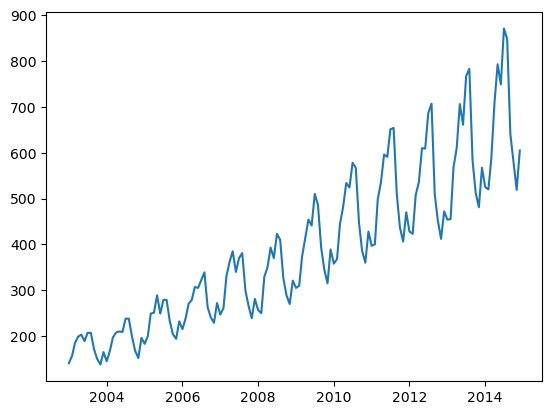

In [25]:
# Graficamos la serie original
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(datos)

In [26]:
# Observamos que existe la serie no es estacionaria:
    # La media es creciente.
    # La varianza es creciete

In [27]:
# Procedemos a calcular el numero de diferencias
import pmdarima

In [28]:
# Respecto a la observacion anterior -> Hay que fijarse 
# si nos sale 0 
# si nos sale 1 no
pmdarima.arima.ndiffs(datos)

1

In [29]:
# Estacionalmente con estacionalidad anual.
pmdarima.arima.nsdiffs(datos, m = 12)


1

### Vemos que en ambos casos recomienda la diferenciacion.


In [30]:
# Inicamos la diferenciacion respecto a la observacion anterior.

datosdiff = pmdarima.utils.diff(datos,lag = 1, differences= 1)

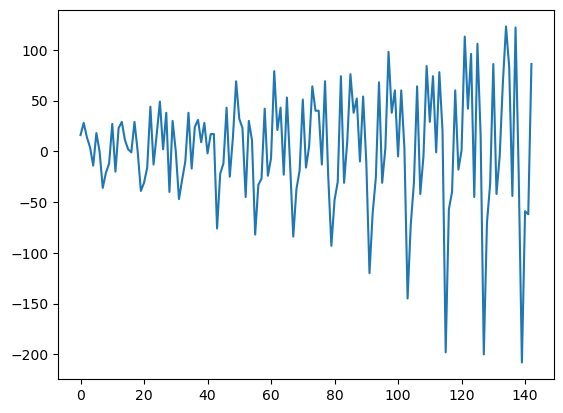

In [31]:
# Graficamos los datos diferenciados.
plt.plot(datosdiff)

In [32]:
# Se soluciona el problema de la media (se vuelve mas constante)
# Pero no el de la varianza, aumenta con el tiempo.

In [33]:
# Determinamos si hay que volver a diferenciarlo
pmdarima.arima.ndiffs(datosdiff)


0

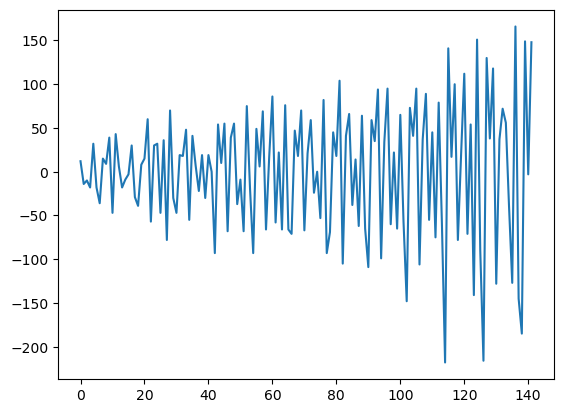

In [34]:
# Indica que no pero lo comprobamos
datosdiff2 = pmdarima.utils.diff(datosdiff,lag = 1, differences= 1)

# Graficamos
plt.plot(datosdiff2)

# Vemos que el problema no se soluciona

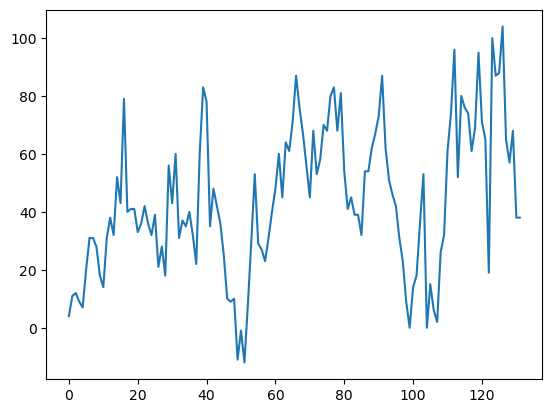

In [5]:
# Pasamos a probar la via estacional.
datosdiff_Est = pmdarima.utils.diff(datos,lag = 12, differences= 1)

# Graficamos.
plt.plot(datosdiff_Est)

# Vemos que mejora pero no es algo claro.

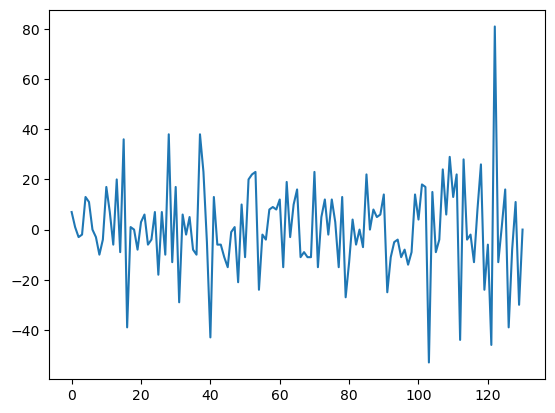

In [6]:
# Vemos si hay que diferenciar respecto a la anteior y estacionalmente.
pmdarima.arima.ndiffs(datosdiff_Est)
pmdarima.arima.nsdiffs(datosdiff_Est, m = 12)

# Recomienda diferenciarlos respecto a la anterior.
datosdiff_Est2 = pmdarima.utils.diff(datosdiff_Est,lag = 1, differences= 1)

# Graficamos
plt.plot(datosdiff_Est2)

# Parece que mejora el problema de la varianza pero se aprecian 3 zonas.

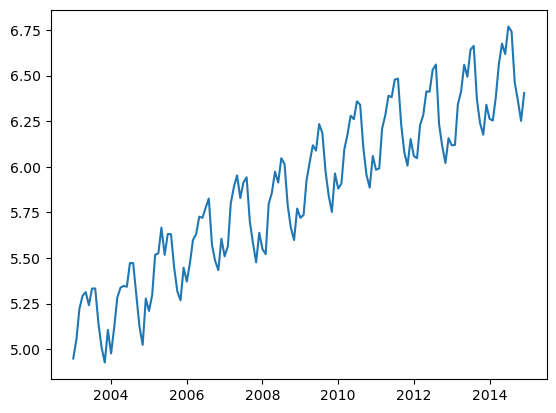

In [7]:
# Probamos tomando logaritmos.
import numpy as np

datos["Creditos_Personales"] = datos["Creditos_Personales"].astype(float)
Log_Datos = pd.DataFrame(np.log(datos["Creditos_Personales"]))

# Graficamos.
plt.plot(Log_Datos)

# Vemos que los logaritmos solos no solucionan nada.

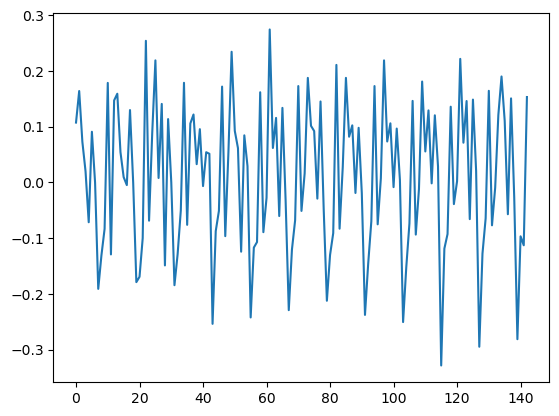

In [8]:
# Vemos si hay que diferenciar
pmdarima.arima.ndiffs(Log_Datos)

# Procedemos a diferenciar.
Log_Datos_Dif = pd.DataFrame(pmdarima.utils.diff(Log_Datos,lag = 1, differences= 1))

# Graficamos
plt.plot(Log_Datos_Dif)

# Parece que es el camino correcto.

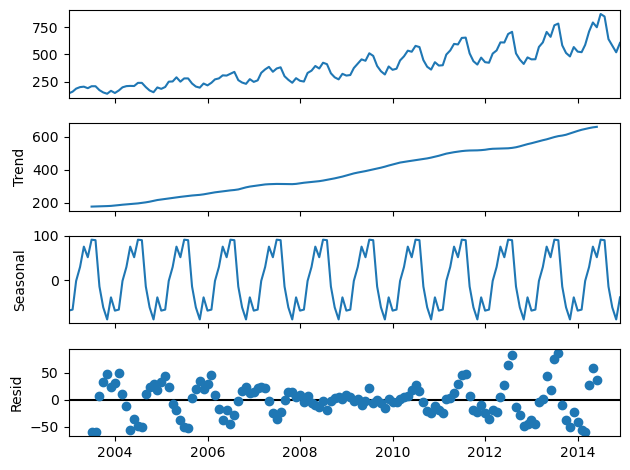

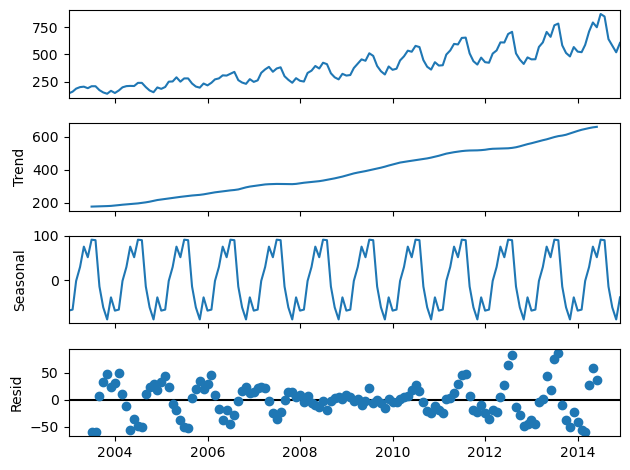

In [11]:
# Continuamos analizando la serie y procedemos a descomponerla y graficarla.

from statsmodels.tsa.seasonal import seasonal_decompose

# De manera aditiva
SerieDescompuesta = seasonal_decompose(datos, model='additive')

# La graficamos.
SerieDescompuesta.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)



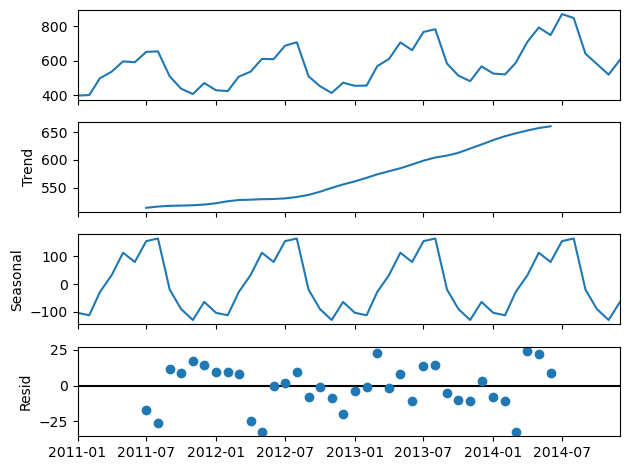

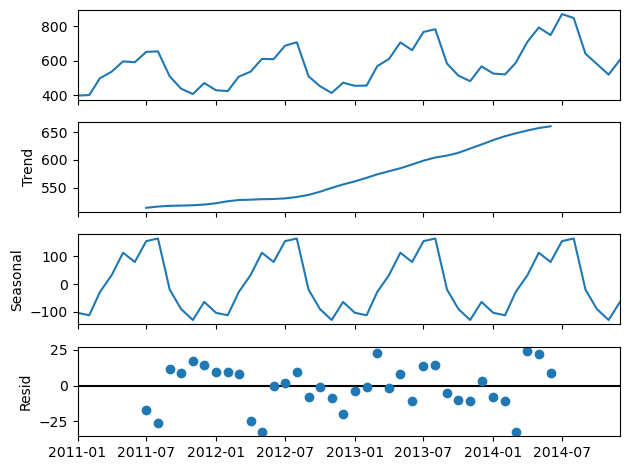

In [13]:
# Vemos la difernecia con los ultimos datos.
datos2 = datos.iloc[96:144,]
SerieDescompuesta2 = seasonal_decompose(datos2, model='additive')
SerieDescompuesta2.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)



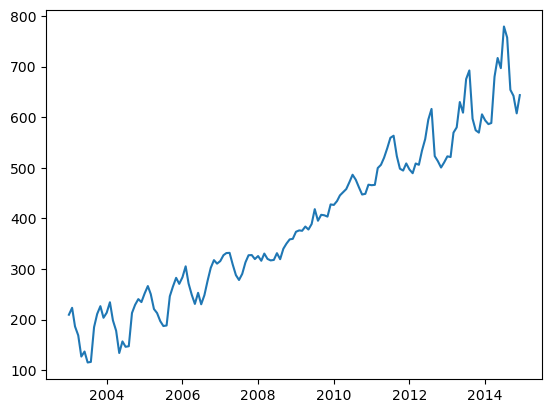

In [14]:
# Calculamos la Serie sin la componente estacional
SerieNoEstacional = datos["Creditos_Personales"] - SerieDescompuesta.seasonal

# La graficamos.
plt.plot(SerieNoEstacional)

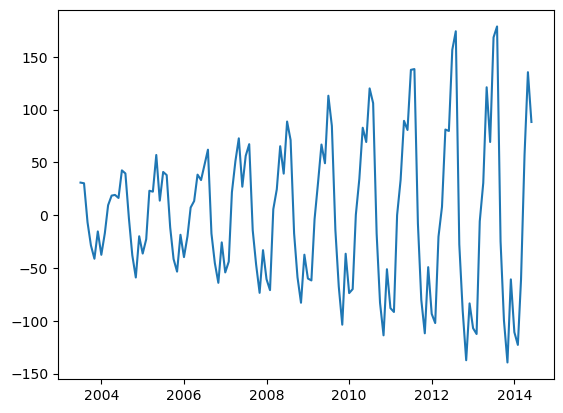

In [15]:
# Calculamos la serie sin ctendencia
SerieSinTendencia = datos["Creditos_Personales"] - SerieDescompuesta.trend

Residuos = datos["Creditos_Personales"] - SerieDescompuesta.seasonal - SerieDescompuesta.trend
# La graficamos.
plt.plot(SerieSinTendencia)

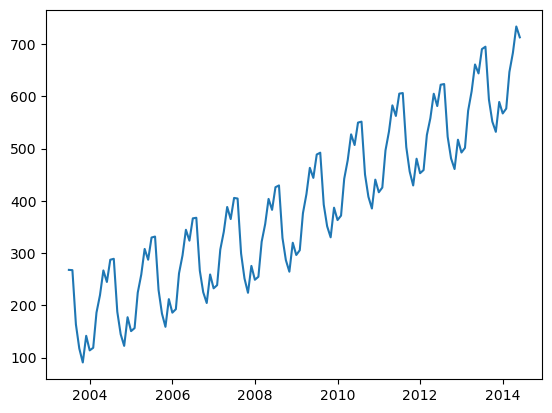

In [16]:
VerEst = SerieDescompuesta.seasonal
# Eliminamos la componente aleatoria.
SerieSinResiduos = datos["Creditos_Personales"] - SerieDescompuesta.resid

# La graficamos.
plt.plot(SerieSinResiduos)

### Procedemos a suavizar la serie buscando algo mas armonico

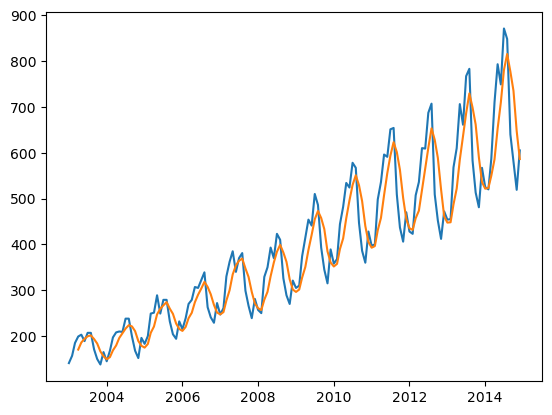

In [ ]:
# Suavizado basado en medias moviles
datos['mov_avg'] = datos['Creditos_Personales'].rolling(4).mean()
# Graficamos esta nueva serie
plt.plot(datos)


In [20]:
# La eliminamos
del (datos['mov_avg'])

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


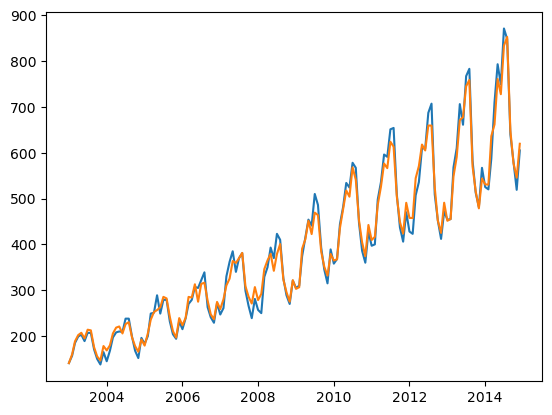

In [21]:
# Tambien podemos realizar un suavizado exponencial
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

model = HWES(datos, seasonal_periods=12, trend='add', seasonal='add').fit()

# Graficamos el suavizado expoencial
datos["HWES"] = model.fittedvalues
plt.plot(datos)

In [22]:
# La eliminamos 
del (datos["HWES"])

### Procedemos a analizar la estariedad de la serie original y de la logaritmica

In [23]:
# ADF
from statsmodels.tsa.stattools import adfuller

# H0: No estacionario (raiz unitaria)


ADF = adfuller(datos["Creditos_Personales"])

# Mostramos los resultados
print('ADF Statistic: %f' % ADF[0])
print('p-value: %f' % ADF[1])

# No tenemos suficiente evidencia estadistica para rechazar H0 -> Serie no estacionaria

ADF Statistic: 1.108825
p-value: 0.995291


In [27]:
# KPSS
from statsmodels.tsa.stattools import kpss

# H0: Serie Estacionaria

KPSS = kpss(datos["Creditos_Personales"])

# Mostramos los valores
print('KPSS Statistic: %f' % KPSS[0])
print('p-value: %f' % KPSS[1])

# Rechazamos H0 -> Serie No estacionaria

KPSS Statistic: 1.634056
p-value: 0.010000


In [28]:
import arch
# PP
from arch.unitroot import PhillipsPerron as PP

# H0: Serie  NO Estacionaria

PP = PP(datos["Creditos_Personales"])

# Mostramos los valores
PP

# No tenemos suficiente evidencia estadistica para rechazar H0 -> Serie no estacionaria

Test Statistic,-1.656
P-value,0.454
Lags,14


In [29]:
# ERS
from arch.unitroot import DFGLS

# H0: Serie  NO Estacionaria

ERS = DFGLS(datos["Creditos_Personales"])

# Mostramos los valores
ERS

# No tenemos suficiente evidencia estadistica para rechazar H0 -> Serie no estacionaria

Test Statistic,1.205
P-value,0.946
Lags,13


Podemos observar en todos los contrastes realizados que la serie origina es claramente no estacionaria.

### Repetimos con las primeras diferencias de los logaritmos. Esta es la serie que graficamente parecia la "mejor".

In [ ]:
# ADF

ADF = adfuller(Log_Datos_Dif[0])

# Mostramos los resultados
print('ADF Statistic: %f' % ADF[0])
print('p-value: %f' % ADF[1])

# Rechazamos H0 al 90%, no al 95%.

ADF Statistic: -2.680467
p-value: 0.077480


In [32]:
# KPSS
KPSS = kpss(Log_Datos_Dif[0])

# Mostramos los valores
print('KPSS Statistic: %f' % KPSS[0])
print('p-value: %f' % KPSS[1])

# No Rechazamos H0 -> Serie Estacionaria.

KPSS Statistic: 0.024525
p-value: 0.100000


In [33]:
# ERS
ERS = DFGLS(Log_Datos_Dif)
ERS

# No rechazamos H0

Test Statistic,-0.208
P-value,0.618
Lags,14


En este caso parece que es una buena aproximacion.


### Pasamos a la fase de modelizacion.

In [35]:
# Analizamos la correlacion y la correlacion parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

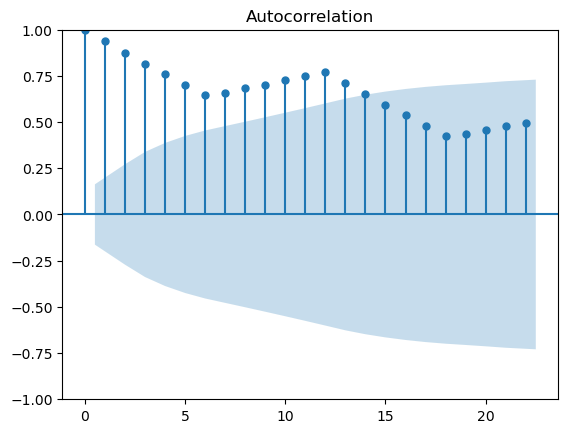

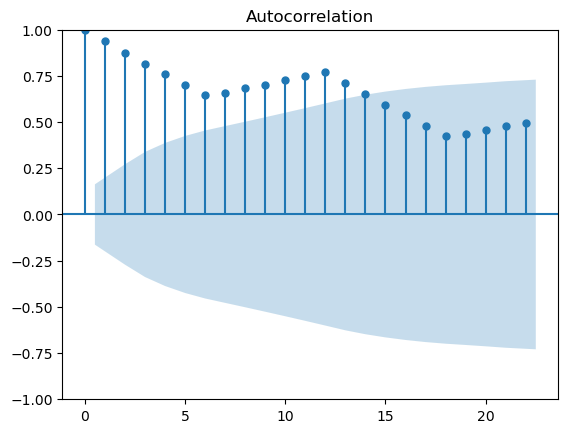

In [36]:
plot_acf(Log_Datos)

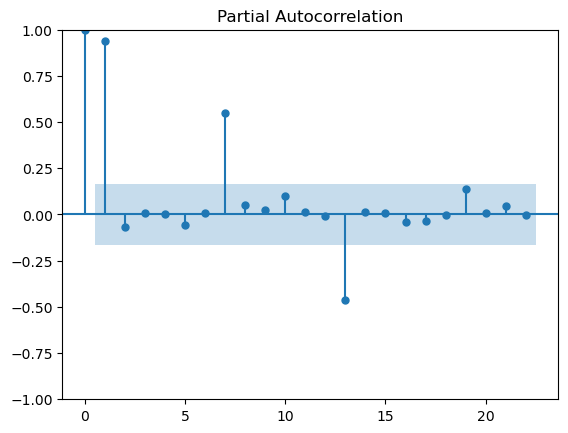

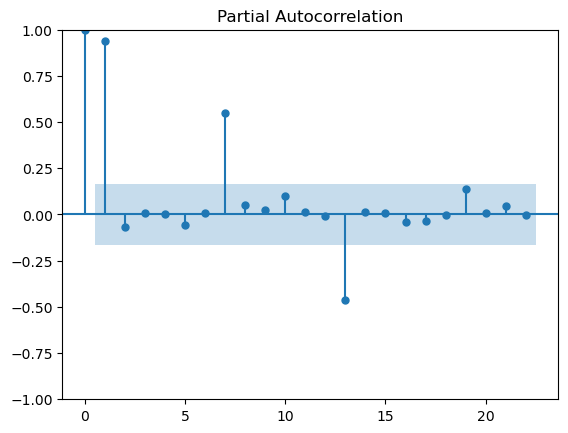

In [37]:
plot_pacf(Log_Datos)

In [38]:
# Dividimos los datos en train y test

train = Log_Datos.loc[:"2010-12-01 00:00:00"]
test = Log_Datos["2011-01-01 00:00:00":]

In [40]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train.iloc[:,0], order=(2,1,1), seasonal_order=(1,0,1,12))

In [41]:
ArimaModel = model.fit()
print (ArimaModel.summary())

test["Predicciones"] = ArimaModel.forecast(len(test))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.56870D-01    |proj g|=  6.79506D+00

At iterate    5    f= -1.58654D+00    |proj g|=  2.61715D+00

At iterate   10    f= -1.59365D+00    |proj g|=  9.56605D-01

At iterate   15    f= -1.59902D+00    |proj g|=  7.03883D-02

At iterate   20    f= -1.59945D+00    |proj g|=  2.59259D-01

At iterate   25    f= -1.59986D+00    |proj g|=  3.20969D-01


 This problem is unconstrained.



At iterate   30    f= -1.61220D+00    |proj g|=  1.14709D-01

At iterate   35    f= -1.63601D+00    |proj g|=  3.56285D-02

At iterate   40    f= -1.63735D+00    |proj g|=  2.82163D-02

At iterate   45    f= -1.63746D+00    |proj g|=  6.65549D-02

At iterate   50    f= -1.63760D+00    |proj g|=  1.08105D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   1.081D-01  -1.638D+00
  F =  -1.6376031603850276     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:        

In [ ]:
import numpy as np

test["Creditos_Personales"] = np.exp(test["Creditos_Personales"])
test["Predicciones"] = np.exp(test["Predicciones"])

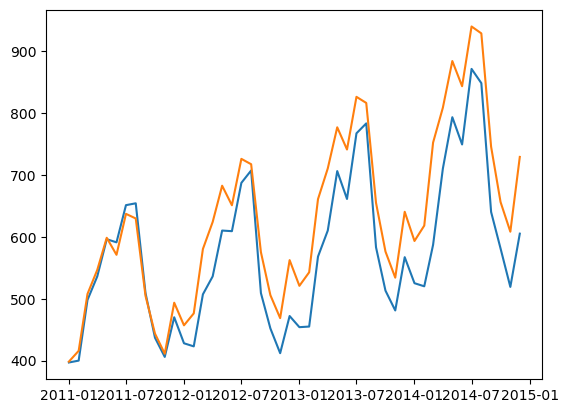

In [45]:
import matplotlib.pyplot as plt

plt.plot(test)

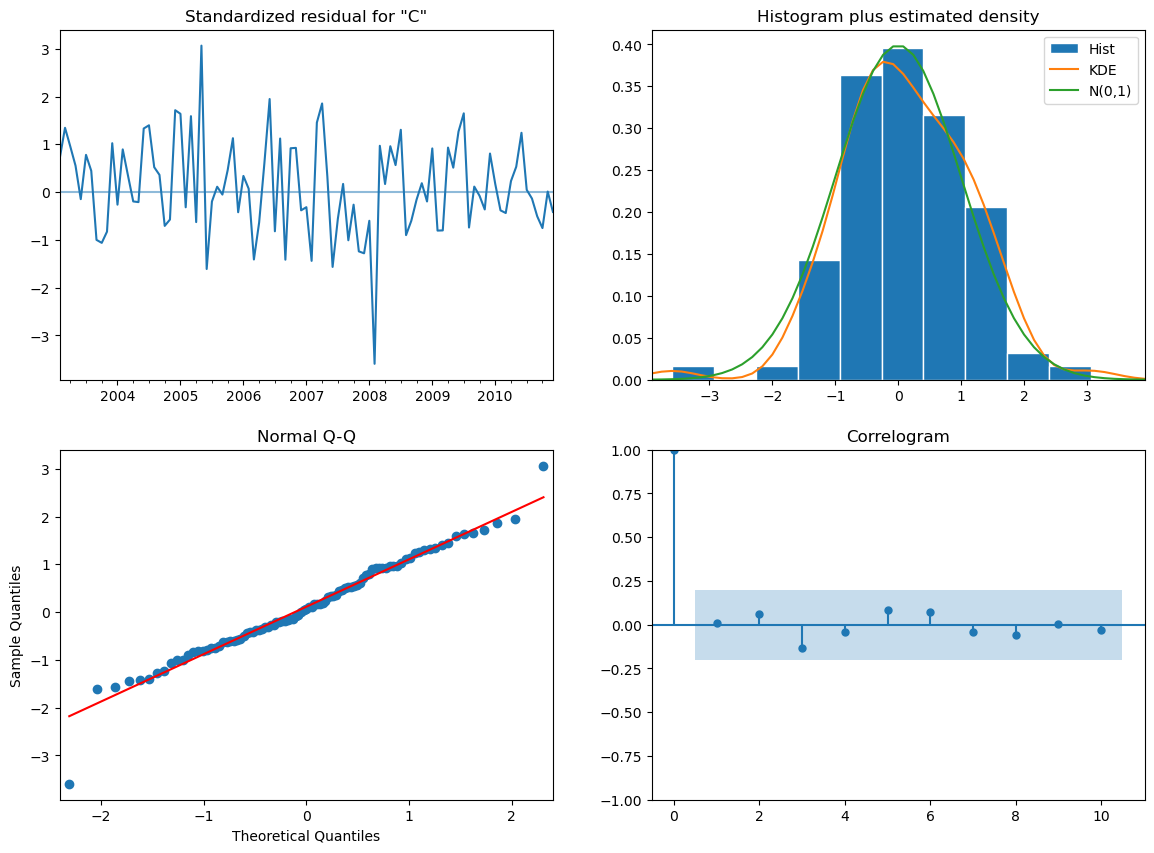

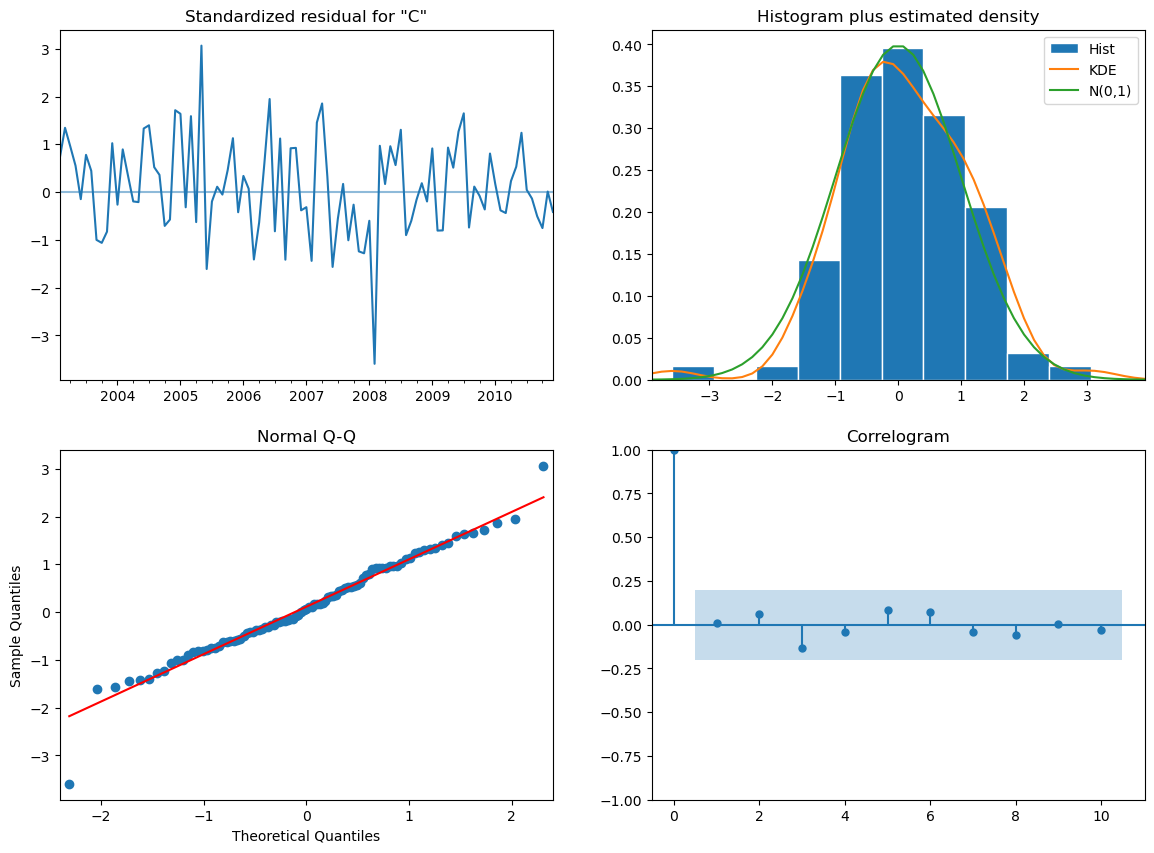

In [46]:
# Analizamos los residuos
ArimaModel.plot_diagnostics(figsize = (14,10))

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

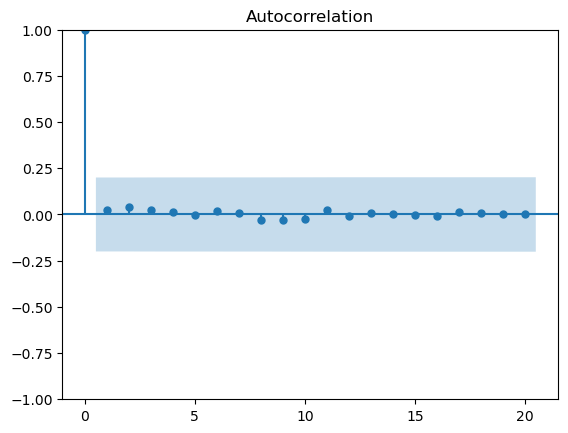

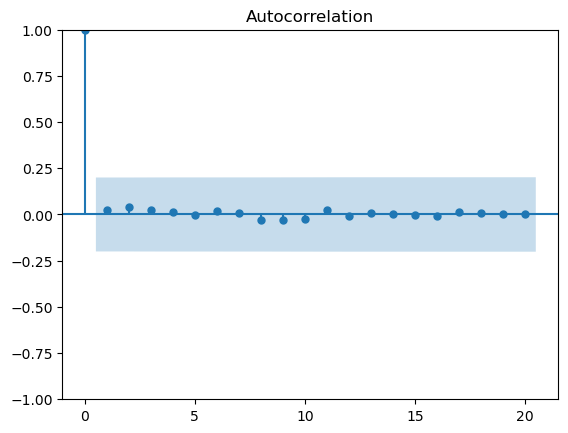

In [48]:
plot_acf(ArimaModel.resid)

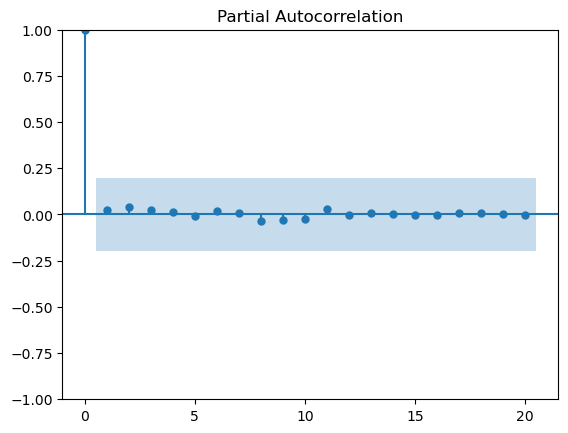

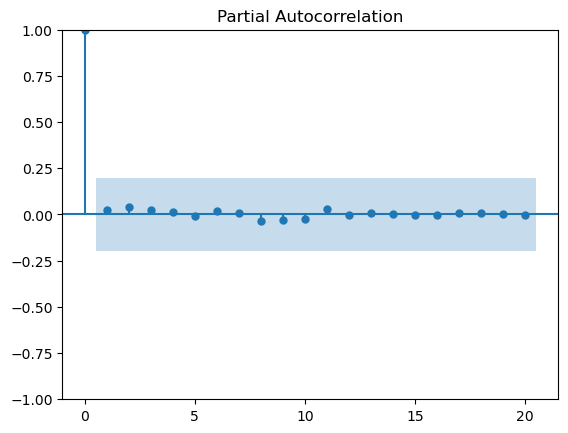

In [49]:
plot_pacf(ArimaModel.resid)